In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

sns.set_style("darkgrid")


/var/folders/c7/n6xdt4qn2ps77x3wbpyn1yfr0000gn/T/ipykernel_5153/1896166066.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("/Users/deogirekartik/Vscode/Technical Seminar/datset/heart_attack_prediction_dataset.csv")
df.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [3]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [4]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']

data2 = df[num_cols]

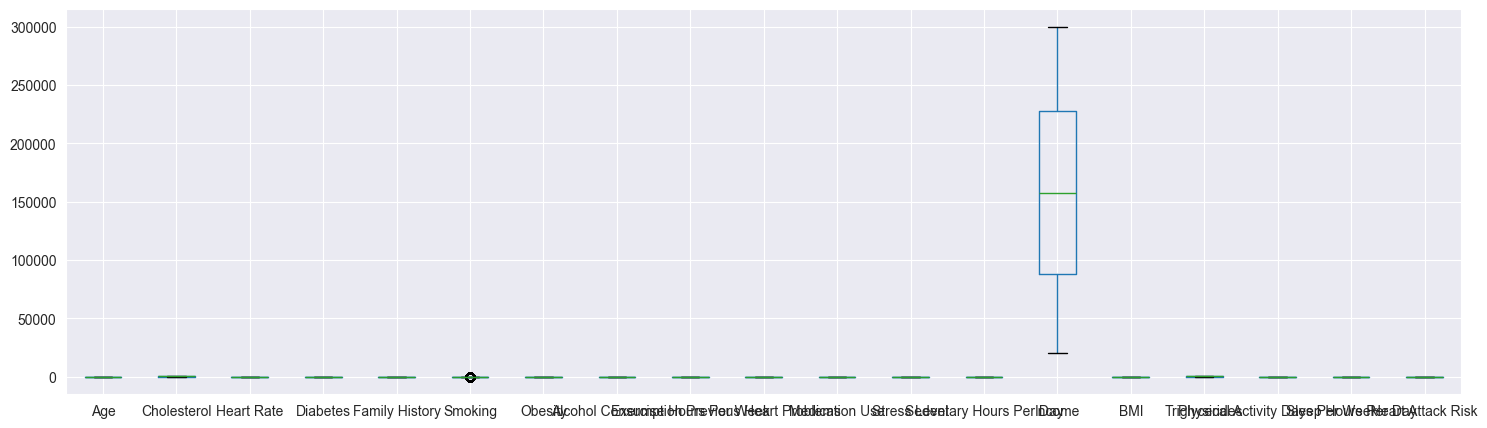

In [5]:
plt.figure(figsize = (18,5))
plt.xticks(rotation = 45)

df.boxplot()
plt.show()



In [6]:
columns_to_drop = ['Patient ID', 'Country', 'Continent', 'Hemisphere', 'Blood Pressure', 'Diet']


# List of columns to drop
columns_to_drop = ['Patient ID', 'Country', 'Continent', 'Hemisphere', 'Blood Pressure', 'Diet']

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1)

# Display the modified DataFrame
print(df.head())
df.dtypes

   Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0   67    Male          208          72         0               0        1   
1   21    Male          389          98         1               1        1   
2   21  Female          324          72         1               0        0   
3   84    Male          383          73         1               1        1   
4   66    Male          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  \
0        0                    0                 4.168189   
1        1                    1                 1.813242   
2        0                    0                 2.078353   
3        0                    1                 9.828130   
4        1                    0                 5.804299   

   Previous Heart Problems  Medication Use  Stress Level  \
0                        0               0             9   
1                        1               0        

Age                                  int64
Sex                                 object
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
dtype: object

In [7]:
import pandas as pd

# Assuming 'df' is your DataFrame
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Perform one-hot encoding for the 'Sex' column
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Display the encoded DataFrame
print(X.head())
df.dtypes


   Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  Obesity  \
0   67          208          72         0               0        1        0   
1   21          389          98         1               1        1        1   
2   21          324          72         1               0        0        0   
3   84          383          73         1               1        1        0   
4   66          318          93         1               1        1        1   

   Alcohol Consumption  Exercise Hours Per Week  Previous Heart Problems  \
0                    0                 4.168189                        0   
1                    1                 1.813242                        1   
2                    0                 2.078353                        1   
3                    1                 9.828130                        1   
4                    0                 5.804299                        1   

   Medication Use  Stress Level  Sedentary Hours Per Day  Income    

Age                                  int64
Sex                                 object
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
dtype: object

In [8]:
df.dtypes

Age                                  int64
Sex                                 object
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
dtype: object

In [9]:
X = df.drop('Heart Attack Risk', axis=1)  # Features
y = df['Heart Attack Risk']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
binary_columns = df.columns[df.apply(lambda col: col.nunique() == 2 and set(col) == {0, 1})]

binary_data = df[binary_columns]
print(binary_data)


      Diabetes  Family History  Smoking  Obesity  Alcohol Consumption  \
0            0               0        1        0                    0   
1            1               1        1        1                    1   
2            1               0        0        0                    0   
3            1               1        1        0                    1   
4            1               1        1        1                    0   
...        ...             ...      ...      ...                  ...   
8758         1               1        1        0                    1   
8759         1               0        0        1                    0   
8760         0               1        1        1                    1   
8761         1               0        1        0                    0   
8762         1               1        0        0                    1   

      Previous Heart Problems  Medication Use  Heart Attack Risk  
0                           0               0           

In [11]:
# X_test.dtypes

## Naive Bayes

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' is your DataFrame
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to one-hot encode the 'Sex' column
encoder = OneHotEncoder(drop='if_binary')  
ct = ColumnTransformer([('encoder', encoder, ['Sex'])], remainder='passthrough')

# Apply the transformation to X_train and X_test
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

# Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6417569880205363
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

[[1125    0]
 [ 628    0]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [13]:
# Check the shapes and data types of y_train and y_test
print("y_train shape:", y_train.shape, "y_train dtype:", y_train.dtype)
print("y_test shape:", y_test.shape, "y_test dtype:", y_test.dtype)

# Check for null values
print("Null values in y_train:", y_train.isnull().sum())
print("Null values in y_test:", y_test.isnull().sum())


y_train shape: (7010,) y_train dtype: int64
y_test shape: (1753,) y_test dtype: int64
Null values in y_train: 0
Null values in y_test: 0


## Prediction using Naive Bayes

In [14]:
# # Now we will test the model
# model_parmeters = [[25,   1, 208,  72,   1,   1,   1,   1,   1,   0,   1,   0,   9,  10,   0,  40, 300,   0,
#    5]]
# # for i in (df.columns:
# #     print("Enter the value for the column", i)
# #     model_parmeters.append(int(input()))
    
# test = model.predict(model_parmeters)
# print(test)
# Create a dictionary to store user inputs
# Define the features for which you want to take user input
selected_features = [
    'Sex','Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
    'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
    'Previous Heart Problems', 'Medication Use', 'Stress Level',
    'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
    'Physical Activity Days Per Week', 'Sleep Hours Per Day'
]

# Create a dictionary to store user inputs
user_inputs = {}

# Function to get user input for a specific feature
def get_user_input(feature_name):
    while True:
        try:
            user_inputs[feature_name] = int(input(f"Enter the value for '{feature_name}': "))
            break
        except ValueError:
            print("Invalid input. Please enter a valid integer.")

# Iterate through selected features to get user input
for feature in selected_features:
    get_user_input(feature)

# Convert the user input dictionary to a DataFrame
user_data = pd.DataFrame([user_inputs])

# Make predictions on the user input data
prediction = model.predict(user_data)

print(f'The predicted Heart Attack Risk for the given input is: {prediction[0]}')

Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid input. Please enter a valid integer.
Invalid in

KeyboardInterrupt: Interrupted by user

In [ ]:
X_train_encoded.shape,y_train.shape

((7010, 19), (7010,))

In [ ]:
X_train_encoded.size

133190

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_encoded, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test_encoded)
acc_score = accuracy_score(y_pred, y_test)
print(acc_score)

0.5641756988020536


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train_encoded, y_train)

RandomForestClassifier()

## Grid search cv

In [ ]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'n_estimators' : [100, 200, 300, 400, 500, 600, 1000],
#               'criterion':['gini', 'entropy', 'log_loss'],
#               'max_depth' : [-1, 10, 20, 30, 50, 100]}

# clf = GridSearchCV(rfc, param_grid=parameters, method = 'scoring', cv = 10)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# Assuming you have created your RandomForestClassifier instance 'rfc' before this point
rfc = RandomForestClassifier()

parameters = {
    'n_estimators': [100,200,300,400,500,600, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


clf = GridSearchCV(rfc, param_grid=parameters, scoring='accuracy', cv=5, verbose=1, n_jobs=7)
clf.fit(X_train_encoded, y_train)


Fitting 5 folds for each of 756 candidates, totalling 3780 fits


KeyboardInterrupt: 

In [ ]:
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_encoded)
acc_score = accuracy_score(y_pred, y_test)
print(acc_score)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.